In [135]:
import numpy as np
from sklearn.model_selection import KFold
# https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/
# https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [136]:
data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

In [137]:
kfold = KFold(n_splits=3, shuffle=True, random_state=2652124)

In [138]:
# enumerate splits
for train, test in kfold.split(data):
	print('train: %s, test: %s' % (train, test))

train: [0 2 4 5], test: [1 3]
train: [1 3 4 5], test: [0 2]
train: [0 1 2 3], test: [4 5]


The cross_val_score() function will be used to perform the evaluation, taking the dataset and cross-validation configuration and returning a list of scores calculated for each fold.

In [139]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as pyplot

# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=2652124, shuffle=True)
repeated_cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2652124)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
repated_scores = cross_val_score(model, X, y, scoring='accuracy', cv=repeated_cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print('Accuracy: %.3f (%.3f)' % (mean(repated_scores), std(repated_scores)))

Accuracy: 0.866 (0.047)
Accuracy: 0.864 (0.039)


In [140]:
from sklearn.metrics import accuracy_score
from scipy.stats import sem

scores = []
for train_index, test_index in cv.split(X):
    # print("Train: ", len(train_index))
    # print("Test: ", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score = accuracy_score(y_test, pred)
    scores.append(score)
print(f'Accuracy: {mean(scores):.3f} - {std(scores):.3f} - {sem(scores):.3f}')

Accuracy: 0.866 - 0.04694677837722202 - 0.015648926125740672


In [141]:
scores = []
for i in range(3):
    cv = KFold(n_splits=10, random_state=2652124, shuffle=True)
    for train_index, test_index in cv.split(X):
        # print("Train: ", len(train_index))
        # print("Test: ", len(test_index))
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        score = accuracy_score(y_test, pred)
        scores.append(score)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.866 (0.047)


In [142]:
def get_dataset(n_samples=100):
	X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y
def get_model():
	model = LogisticRegression()
	return model

In [143]:
# evaluate the model using a given test condition
def evaluate_model(cv):
	# get the dataset
	X, y = get_dataset()
	# get the model
	model = get_model()
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores), scores.min(), scores.max()

In [144]:
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)

Ideal: 0.840


In [145]:
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = KFold(n_splits=k, shuffle=True, random_state=2652124)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv)
	# report performance
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)

> folds=2, accuracy=0.750 (0.740,0.760)
> folds=3, accuracy=0.810 (0.727,0.939)
> folds=4, accuracy=0.800 (0.720,0.920)
> folds=5, accuracy=0.790 (0.650,0.900)
> folds=6, accuracy=0.803 (0.647,1.000)
> folds=7, accuracy=0.792 (0.571,1.000)
> folds=8, accuracy=0.791 (0.500,1.000)
> folds=9, accuracy=0.790 (0.455,1.000)
> folds=10, accuracy=0.800 (0.500,1.000)
> folds=11, accuracy=0.831 (0.556,1.000)
> folds=12, accuracy=0.840 (0.500,1.000)
> folds=13, accuracy=0.826 (0.375,1.000)
> folds=14, accuracy=0.820 (0.429,1.000)
> folds=15, accuracy=0.827 (0.429,1.000)
> folds=16, accuracy=0.821 (0.333,1.000)
> folds=17, accuracy=0.841 (0.500,1.000)
> folds=18, accuracy=0.846 (0.500,1.000)
> folds=19, accuracy=0.832 (0.400,1.000)
> folds=20, accuracy=0.820 (0.400,1.000)
> folds=21, accuracy=0.826 (0.400,1.000)
> folds=22, accuracy=0.830 (0.400,1.000)
> folds=23, accuracy=0.830 (0.250,1.000)
> folds=24, accuracy=0.833 (0.250,1.000)
> folds=25, accuracy=0.830 (0.250,1.000)
> folds=26, accuracy=0.8

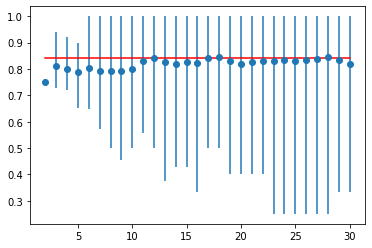

In [146]:
...
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

>1 mean=0.8660 se=0.016
>2 mean=0.8650 se=0.009
>3 mean=0.8640 se=0.007
>4 mean=0.8640 se=0.007
>5 mean=0.8636 se=0.006
>6 mean=0.8648 se=0.005
>7 mean=0.8650 se=0.005
>8 mean=0.8650 se=0.004
>9 mean=0.8652 se=0.004
>10 mean=0.8655 se=0.004
>11 mean=0.8654 se=0.003
>12 mean=0.8651 se=0.003
>13 mean=0.8651 se=0.003
>14 mean=0.8651 se=0.003
>15 mean=0.8650 se=0.003


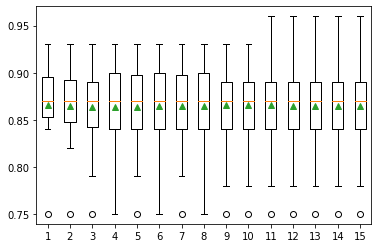

In [147]:
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=2652124)
	# create model
	model = LogisticRegression()
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()